In [5]:
import numpy as np
import matplotlib.pyplot as plt
from utils.calc_p import asymptotic_expectation_zero, objective
from scipy.optimize import fsolve

### 实验p与J的关系
Setting: 保证平稳reward=0时，p只有一个解  
$ \mu = 0, log(p) \sim -J $, 

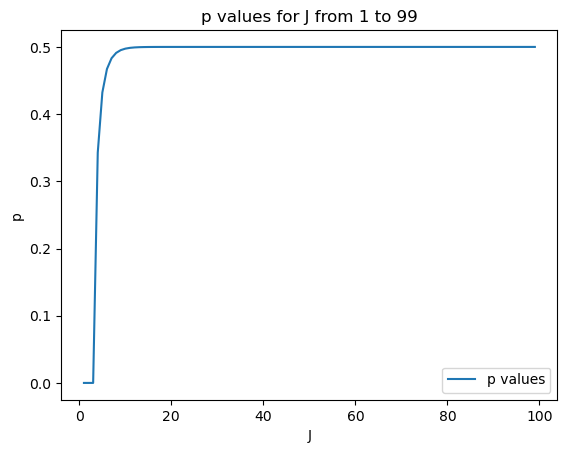

In [2]:
# 定义J的范围 1-100太大了，可以适当缩小范围
J_values = np.arange(1, 100)

# 初始猜测p值
p_initial_guess = 0.5

# 存储每个J对应的p值
p_values = []

# 计算每个J对应的p值
for J in J_values:
    p_solution = fsolve(objective, p_initial_guess, args=(J))
    p_values.append(p_solution[0])

# 绘制J与p值的关系曲线
plt.plot(J_values[:], p_values[:], label='p values')
plt.xlabel('J')
plt.ylabel('p')
plt.title(f'p values for J from {J_values[0]} to {J_values[-1]}')
plt.legend()
plt.show()

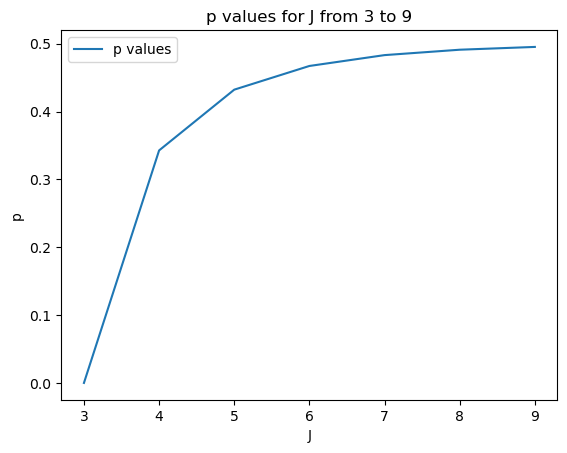

In [3]:
# 定义J的范围 3-10 差不多还能经常触发一下
J_values = np.arange(3, 10)

# 初始猜测p值
p_initial_guess = 0.5
# p_initial_guess = 1e-8

# 存储每个J对应的p值
p_values = []

# 计算每个J对应的p值
for J in J_values:
    p_solution = fsolve(objective, p_initial_guess, args=(J))
    p_values.append(p_solution[0])

# 绘制J与p值的关系曲线
plt.plot(J_values, p_values, label='p values')
plt.xlabel('J')
plt.ylabel('p')
plt.title(f'p values for J from {J_values[0]} to {J_values[-1]}')
plt.legend()
plt.show()

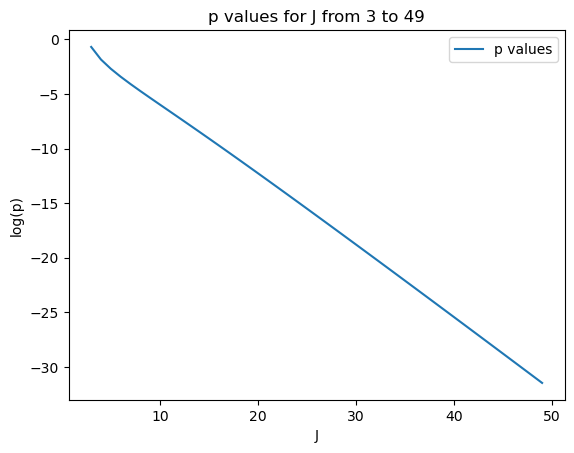

In [4]:
# 探究log(p)与J的关系
J_values = np.arange(3, 50)

# 初始猜测p值
p_initial_guess = 0.5
# p_initial_guess = 1e-8 ??

# 存储每个J对应的p值
p_values = []

# 计算每个J对应的p值
for J in J_values:
    p_solution = fsolve(objective, p_initial_guess, args=(J))
    p_values.append(p_solution[0])

# 绘制J与p值的关系曲线
plt.plot(J_values, np.log(0.5-np.array(p_values)), label='p values')
plt.xlabel('J')
plt.ylabel('log(p)')
plt.title(f'p values for J from {J_values[0]} to {J_values[-1]}')
plt.legend()
plt.show()

### p^o和J的关系

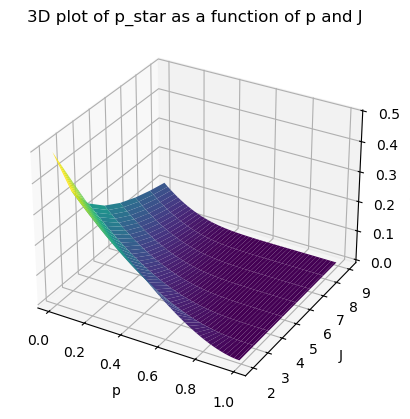

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# numerator = p * (1 - p)**J
# denominator = 1 - (1 - p)**J
# p_star = numerator / denominator
# 定义p和J的范围
p_values = np.linspace(0.01, 0.99, 100)  # 避免p为0或1导致分母为0
J_values = np.arange(2, 10)

# 创建网格
P, J = np.meshgrid(p_values, J_values)

# 计算p_star
numerator = P * (1 - P)**J
denominator = 1 - (1 - P)**J
p_star = numerator / denominator

# 绘制三维图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(P, J, p_star, cmap='viridis')

ax.set_xlabel('p')
ax.set_ylabel('J')
ax.set_zlabel('p_star')
ax.set_title('3D plot of p_star as a function of p and J')

plt.show()